<div style="border:solid Chocolate 2px; padding: 40px">

<b> Марианна, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<h2> Комментарий студента <a class="tocSkip"> </h2>

Привет, Алексей! Не против обращаться на "ты". Свои исправления/комментарии буду добавлять после твоих комментариев. 

# Анализ лояльности пользователей Яндекс Афиши

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. 

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

In [1]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [2]:
# При необходимости добавляйте новые ячейки для кода или текста

Установка специальных библиотек для подключения к базе данных. 

In [3]:
!pip install sqlalchemy

In [4]:
!pip install psycopg2-binary

In [5]:
!pip install phik

In [6]:
!pip install python-dotenv

Импортирование библиотек для дальнейшей работы с датафреймом и SQL-запросами.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from phik import phik_matrix
from sqlalchemy import create_engine

In [8]:
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

pandas: 1.2.4
numpy: 1.21.1
matplotlib: 3.3.4
seaborn: 0.11.1


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> В варианте проекта для платформы блок с `getenv` не нужен, так как в кластере нет твоего `env` файла - ниже ты создаёшь соединение классическим способом.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Стоит использовать `f-строки`, а параметры подключения хранить в переменных, чтобы можно было динамически управлять подключением.

In [9]:
import os
from dotenv import load_dotenv

load_dotenv()  # Загружает переменные из .env

DB_HOST = os.getenv('DB_HOST')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_NAME=os.getenv('DB_NAME')
DB_PORT=os.getenv('DB_PORT')
DB_USER=os.getenv('DB_USER')

In [10]:
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(connection_string)

In [11]:
#Извлечение SQL-запроса
query = '''
-- Настройка параметра synchronize_seqscans важна для проверки
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
),

-- Напишите ваш запрос ниже
days AS (
  SELECT 
    p.user_id, 
    p.device_type_canonical,
    p.order_id, 
    p.created_dt_msk AS order_dt, 
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,  
    p.tickets_count,
    CASE WHEN COUNT(*) OVER (PARTITION BY p.user_id) > 1
        THEN p.created_dt_msk::DATE - LAG(p.created_dt_msk::DATE) OVER (
          PARTITION BY p.user_id 
          ORDER BY p.created_dt_msk)
        ELSE NULL END AS days_since_prev,
    p.event_id,
    p.service_name,
    e.event_type_main,
    r.region_name,
    c.city_name
  FROM afisha.purchases as p
  JOIN afisha.events as e USING(event_id)
  JOIN afisha.city as c ON e.city_id = c.city_id
  JOIN afisha.regions as r ON c.region_id = r.region_id
  WHERE p.device_type_canonical IN('mobile','desktop') AND e.event_type_main != 'фильм')
SELECT *
FROM days
ORDER BY user_id, order_dt;
'''

In [12]:
#Запись SQL-запроса в датафрейм
df = pd.read_sql_query(query, con=engine)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Данные выгружены из базы.

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

Пропусков не обнаружено, кроме столбца days_since_prev - значит, есть совершённые заказы в количестве 1. Типы данных нужно скорректировать: в столбце order_dt нужно поменять тип на дату без времени, поле currency_code можно относети в категориальное, поэтому изменим его тип с object на category; также можно понизить размерность в столбце order_id до int32, revenue - float32, ickets_count - int16, days_since_prev - int16 (поскольку максимальное значение равно 149, и все значения - целые), event_id - int32.

In [14]:
#Сохраним размерность изначального датасета до преобразований
temp = df.copy()
len(temp)

290611

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Данные осмотрели, наметили шаги по их обработке.

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [15]:
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [16]:
#Расчёт рублей за 1 тенге
df_tenge['rub_per_tg'] = df_tenge['curs'] / df_tenge['nominal']

In [17]:
#Соединяем рассчитанный столбец с основным датасетом
df_merged = df.merge(
    df_tenge[['data', 'rub_per_tg']],
    left_on=df['order_dt'].dt.date.astype(str),
    right_on='data',
    how='left'
)

In [18]:
def convert_to_rub(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    else:
        return row['revenue'] * row['rub_per_tg']

df_merged['revenue_rub'] = df_merged.apply(convert_to_rub, axis=1)

In [19]:
#Проверка, что перевод валюты был совершен
kzt_row_old = df[df['currency_code'] == 'kzt'].iloc[0]
old_index = kzt_row_old.name
print(f"Индекс: {old_index}")
print(f"revenue: {kzt_row_old['revenue']}")
kzt_row_new = df_merged.loc[old_index]
print(f"Индекс: {old_index}")
print(f"revenue: {kzt_row_new['revenue']}")
print(f"rub_per_tg: {kzt_row_new['rub_per_tg']}")
print(f"revenue_rub: {kzt_row_new['revenue_rub']}")

Индекс: 70
revenue: 518.1
Индекс: 70
revenue: 518.1
rub_per_tg: 0.190125
revenue_rub: 98.5037625


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Выручка приведена к единой валюте.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Решение с `.apply` неэффективное, так как оно применяет функцию к каждой строке таблицы поочерёдно - это может быть затратно на больших таблицах. Лучше использовать маски:
        
   
```py# Создаем Series (словарь) из курсов: 'data' -> 'curs'
# Это нужно сделать один раз, а не на каждой строке.
rate_map = exchange_rates.set_index('data')['curs']

# Используем .map() для "подтягивания" курса в df по дате 'order_dt'
# Это C-оптимизированная операция, во много раз быстрее apply
df['rate'] = df['order_dt'].map(rate_map)

# Инициализируем новую колонку значением по умолчанию
df['revenue_rub'] = df['revenue']

# Создаем маску (условие) для строк, которые нужно конвертировать
mask = df['currency_code'] == 'kzt'

# Выполняем векторизированную операцию ТОЛЬКО для нужных строк
df.loc[mask, 'revenue_rub'] = df['revenue'] * df['rate'] / 100  
```

<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Не знала о таком подходе, теперь буду иметь в виду, благодарю!

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

In [20]:
df_merged.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
service_name                 0
event_type_main              0
region_name                  0
city_name                    0
data                         0
rub_per_tg                   0
revenue_rub                  0
dtype: int64

Пропуски обнаружены в поле days_since_prev, что и должно быть. В других столбцах их нет. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Пропуски изучены. Новых пропусков, кроме ожидаемых, в данных нет.

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

In [22]:
#Изменение типа df['currency_code']
df_merged['currency_code'] = df_merged['currency_code'].astype('category')

In [23]:
#Изменение типов числовых полей
df_merged['order_id'] = df_merged['order_id'].astype('int32')
df_merged['revenue'] = df_merged['revenue'].astype('float32')
df_merged['tickets_count'] = df_merged['tickets_count'].astype('int16')
df_merged['days_since_prev'] = df_merged['days_since_prev'].astype('Int16')

In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int32         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  category      
 6   revenue                290611 non-null  float32       
 7   tickets_count          290611 non-null  int16         
 8   days_since_prev        268678 non-null  Int16         
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

Типы некоторых полей преобразованы. Типы с датой и временем не изменялись, поскольку нельзя будет производить различные операции (например, сложение и вычитание), также нельзя использовать .dt.accessor, тип datetime[ns] автоматически проверяет корректность заполнения, в то время как object допустит любой вид написания даты и времени.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Типы данных скорректированы.

Продолжим анализ далее. Проведем проверку номинальных полей, к ним относятся: currency_code, device_type_canonica, service_name, city_name, region_name.  

nominal_columns = ['currency_code', 'device_type_canonical', 'service_name', 'city_name', 'region_name']
for col in nominal_columns:
    if col in df_merged.columns:
        print(f"\n{col}")
        print(f"Уникальных значений: {df_merged[col].nunique()}")
        print(f"Пропуски: {df_merged[col].isna().sum()} ({df_merged[col].isna().mean()*100:.1f}%)")
        

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Такая проверка не покажет срктыыте ошибки и необходимость их исправления - стоит вывести и явно изучить уникальные значения признаков.

In [25]:
print(f"Уникальные значения поля currency_code в количестве {df_merged['currency_code'].nunique()}")
print(df_merged['currency_code'].unique(), '\n')

print(f"Уникальные значения поля  device_type_canonical в количестве {df_merged['device_type_canonical'].nunique()}")
print(df_merged['device_type_canonical'].unique(), '\n')

print(f"Уникальные значения поля service_name в количестве {df_merged['service_name'].nunique()}")
print(df_merged['service_name'].unique(), '\n')

print(f"Уникальные значения поля city_name в количестве {df_merged['city_name'].nunique()}")
print(df_merged['city_name'].unique(), '\n')

print(f"Уникальные значения поля region_name в количестве {df_merged['region_name'].nunique()}")
print(df_merged['region_name'].unique(), '\n')

Уникальные значения поля currency_code в количестве 2
['rub', 'kzt']
Categories (2, object): ['rub', 'kzt'] 

Уникальные значения поля  device_type_canonical в количестве 2
['mobile' 'desktop'] 

Уникальные значения поля service_name в количестве 36
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете'] 

Уникальные значения поля city_name в количестве 352
['Глиногорск' 'Озёрск' 'Родниковецк' 'Кристалевск' 'Дальнозолотск'
 'Радужнополье' 'Радужсвет' 'Кумсай' 'Верховино' 'Светополье' 'Кокжар'
 'Каменский' 'Лесоярич' 'Никольянов' 'Р

Проведена оценка уникальных значений:
- в currency_code 2 уникальных значения (рубли и тенге)
- в service_name 36 уникальных значений 
- в city_name 352 уникальных значения
- в region_name 81 уникальных значений

Все значения в корректном виде, ошибочных значений не выявлено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нормализация должна исправлять какие-то проблемы в данных - в противном случае её нет смысла делать. В нашем случае она что-то исправляет?

<h2> Комментарий студента <a class="tocSkip"> </h2>

Изначально делала нормализацию, чтобы удостовериться в том, что нет неоднозначных написаний, например, Rub и rub, и после нормализации как раз сравнивала два написания (в количестве уникальных значений и самих значений). Значения не поменялись, значит изменения в регистре не требовались. Не увидела критичного в оставлении в нижнем регистре. Это в том числе было проверкой для себя. Но с проверкой уникальных значений явно этого и правда не потребовалось (и в таком случае такая проверка дала бы удостовериться, что не пропустила каких-то значений/двояких написаний?). 
    
Если делать такую проверку, то в таком случае пришлось бы возвращать изначальное написание? Методом str.capitalize(), например?

Далее приступим к исследованию численных данных. Выявим аномальные значения, визуализируем их.

In [26]:
numerical_columns = ['revenue', 'revenue_rub', 'tickets_count', 'days_since_prev', 'rub_per_tg']

describe_list = []
for col in numerical_columns:
    if col in df_merged:
        desc = df_merged[col].describe()
        describe_list.append(desc)

result_df = pd.concat(describe_list, axis=1)
print(result_df.round(2))

         revenue  revenue_rub  tickets_count  days_since_prev  rub_per_tg
count  290611.00    290611.00      290611.00        268678.00   290611.00
mean      625.58       555.57           2.75             3.22        0.19
std      1227.69       875.50           1.17            11.35        0.01
min       -90.76       -90.76           1.00             0.00        0.18
25%       116.85       113.97           2.00             0.00        0.19
50%       356.01       351.14           3.00             0.00        0.19
75%       810.13       802.05           4.00             1.00        0.20
max     81174.54     81174.54          57.00           148.00        0.20


В поле revenue_rub есть выбросы: максимальное значение = 81174.54, что значительно превышает 75%, равный 802.05. Поэтому отфильтруем по 99% это поле.

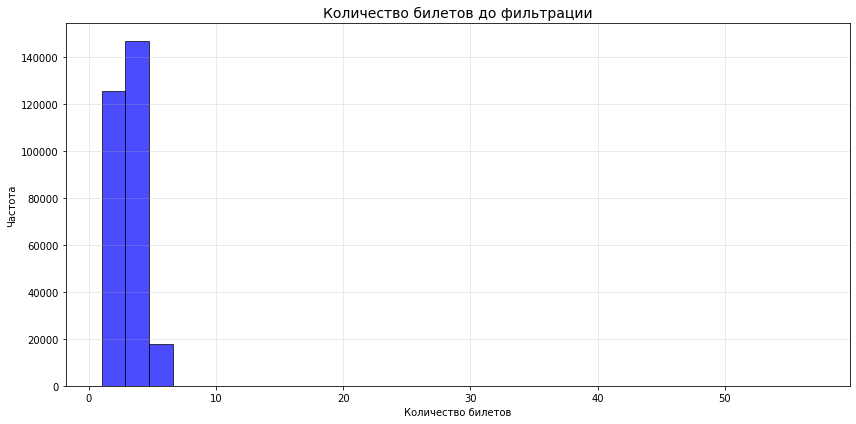

In [27]:
#Tickets Count до фильтрации
plt.figure(figsize=(12, 6))
plt.hist(df_merged['tickets_count'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Количество билетов до фильтрации', fontsize=14)
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


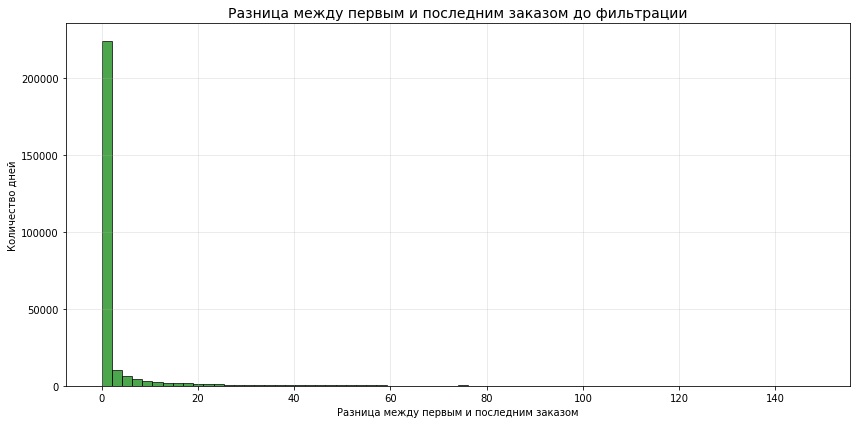

In [28]:
#Days Since Prev до фильтрации
plt.figure(figsize=(12, 6))
plt.hist(df_merged['days_since_prev'].dropna(), bins=70, alpha=0.7, color='green', edgecolor='black')
plt.title('Разница между первым и последним заказом до фильтрации', fontsize=14)
plt.xlabel('Разница между первым и последним заказом')
plt.ylabel('Количество дней')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

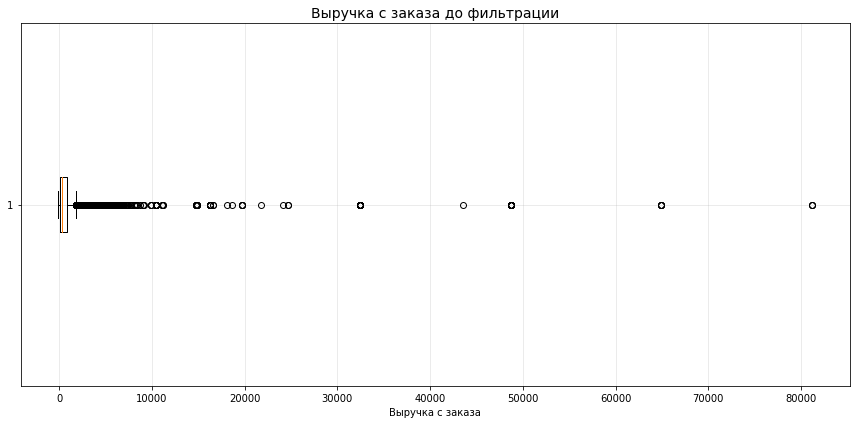

In [29]:
#Revenue Rub до фильтрации
plt.figure(figsize=(12, 6))
plt.boxplot(df_merged['revenue_rub'].dropna(), vert=False)
plt.title('Выручка с заказа до фильтрации', fontsize=14)
plt.xlabel('Выручка с заказа')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
percentile_99 = df_merged['revenue_rub'].quantile(0.99)
df_filtered = df_merged[df_merged['revenue_rub'] <= percentile_99]
temp1 = df_filtered.copy()
print('Исходный размер: ', len(temp))
print('Отфильтрованный размер: ',len(temp1))
print('Разница: ', (len(df_merged) - len(df_filtered)))

Исходный размер:  290611
Отфильтрованный размер:  287786
Разница:  2825


In [31]:
describe_list_filtered = []
for col in numerical_columns:
    if col in df_merged:
        desc = df_filtered[col].describe()
        describe_list_filtered.append(desc)

result_df_filtered = pd.concat(describe_list_filtered, axis=1)
print(result_df_filtered.round(2))

         revenue  revenue_rub  tickets_count  days_since_prev  rub_per_tg
count  287786.00    287786.00      287786.00        266050.00   287786.00
mean      572.40       518.03           2.74             3.22        0.19
std       835.97       511.96           1.16            11.35        0.01
min       -90.76       -90.76           1.00             0.00        0.18
25%       115.54       111.85           2.00             0.00        0.19
50%       348.27       343.85           3.00             0.00        0.19
75%       795.31       788.66           3.00             1.00        0.20
max     13784.26      2628.42          57.00           148.00        0.20


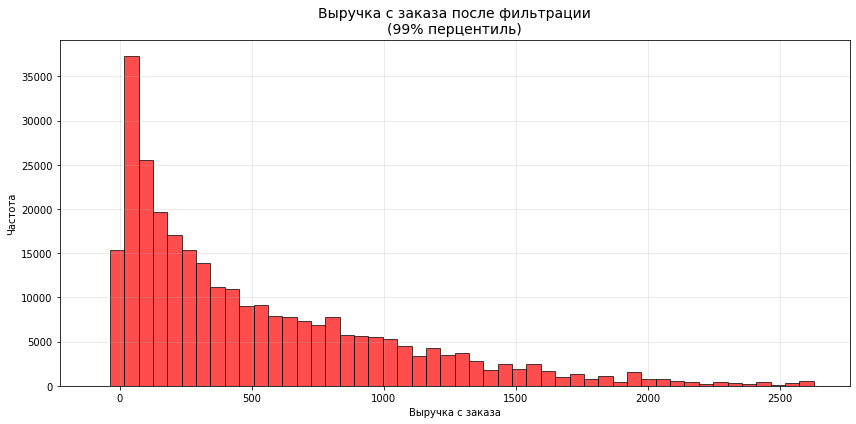

In [32]:
#Revenue Rub после фильтрации
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['revenue_rub'], bins=50, alpha=0.7, color='red', edgecolor='black')
plt.title('Выручка с заказа после фильтрации\n(99% перцентиль)', fontsize=14)
plt.xlabel('Выручка с заказа')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

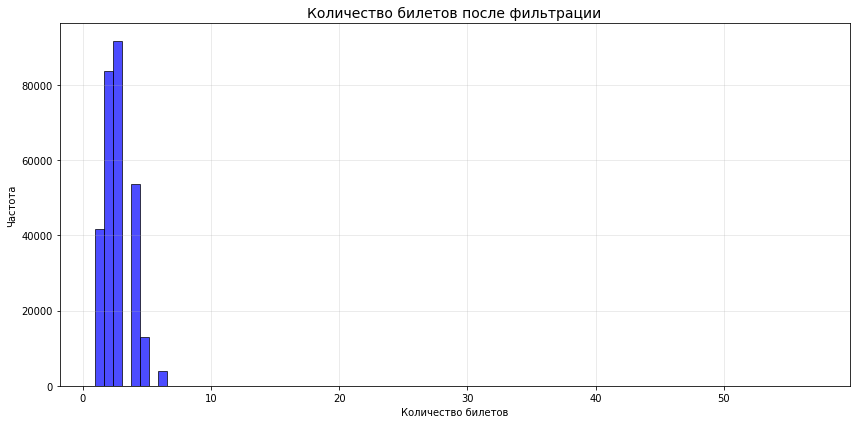

In [33]:
#tickets_count после фильтрации
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['tickets_count'], bins=80, alpha=0.7, color='blue', edgecolor='black')
plt.title('Количество билетов после фильтрации', fontsize=14)
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

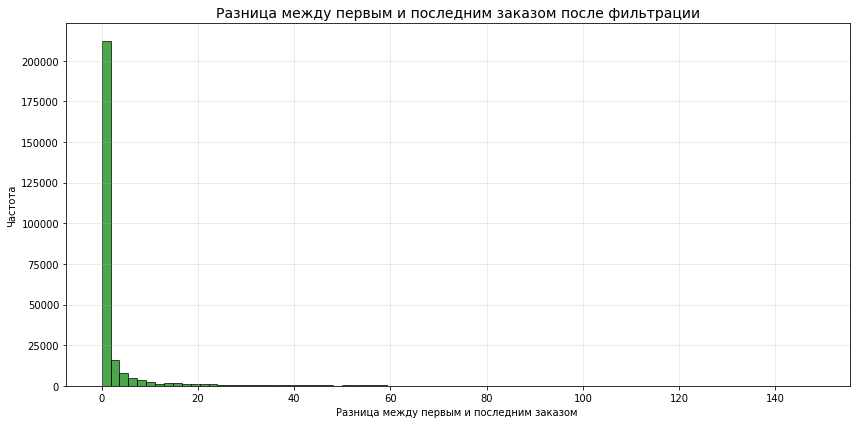

In [34]:
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['days_since_prev'].dropna(), bins=80, alpha=0.7, color='green', edgecolor='black')
plt.title('Разница между первым и последним заказом после фильтрации', fontsize=14)
plt.xlabel('Разница между первым и последним заказом ')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Численные признаки изучены, удалены выбросы.

Таким образом, пропуски обнаружены только в days_since_prev (ожидаемо для первых заказов), остальные поля заполнены полностью.
Номинальные поля приведены к единому формату (currency_code, device_type, service_name, city_name, region_name) - количество уникальных значений не изменилось.
В поле revenue_rub выявлены экстремальные значения (max = 81174.54 руб. при 75% 802.05 руб.). Данные отфильтрованы по 99% перцентилю - удалено 2825 записей. Минимальное значение в этом поле равно -90.76: это могут быть возвраты/отмены заказов, ошибки, корректировки платежей или цен.
Получен очищенный датасет из 287786 записей, готовый для дальнейшего анализа.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично, что не забываешь о промежуточном выводе после обработки данных.

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Выделение первых значений по категориям можно также сделать в блоке с `agg` - не стоит без нужды усложнять решение.

<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Добавила сразу поле avg_days_between_orders из следующего твоего комментария.

In [35]:
account_user = df_filtered.groupby('user_id').agg(
    first_order_date=('order_dt', 'min'),
    last_order_date=('order_dt', 'max'),
    total_orders=('order_id', 'count'),
    avg_revenue_rub=('revenue_rub', 'mean'),
    avg_tickets_count=('tickets_count', 'mean'),
    avg_days_between_orders=('days_since_prev', 'mean'),
    first_device=('device_type_canonical', 'first'),
    first_region=('region_name', 'first'),
    first_service_name=('service_name', 'first'),
    first_event_type=('event_type_main', 'first')
).reset_index()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Время между заказами уже посчитано в `days_since_prev` - повторно пересчитывать разницу руками не нужно. Аналогично стоит перенести усреднение в блок с `agg`.

In [36]:
account_user['is_two'] = (account_user['total_orders'] >= 2).astype(int)
account_user['is_five'] = (account_user['total_orders'] >= 5).astype(int)

temp2 = account_user.copy()

print("Размер датафрейма account_user:", account_user.shape)
display(account_user.head())
print("\nИнформация о столбцах:")
print(account_user.info())

Размер датафрейма account_user: (21854, 13)


,user_id,first_order_date,last_order_date,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between_orders,first_device,first_region,first_service_name,first_event_type,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,1,1521.940000,4.000000,<NA>,mobile,Каменевский регион,Край билетов,театр,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,2,774.010000,3.000000,75.0,mobile,Каменевский регион,Мой билет,выставки,1,0
2,000898990054619,2024-07-13,2024-10-23,3,767.213333,2.666667,51.0,mobile,Североярская область,Лови билет!,другое,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,1,917.830000,4.000000,<NA>,desktop,Каменевский регион,Край билетов,театр,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,2,61.310000,1.500000,16.0,mobile,Поленовский край,Лучшие билеты,театр,1,0



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21854 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  21854 non-null  object        
 1   first_order_date         21854 non-null  datetime64[ns]
 2   last_order_date          21854 non-null  datetime64[ns]
 3   total_orders             21854 non-null  int64         
 4   avg_revenue_rub          21854 non-null  float64       
 5   avg_tickets_count        21854 non-null  float64       
 6   avg_days_between_orders  13513 non-null  Float64       
 7   first_device             21854 non-null  object        
 8   first_region             21854 non-null  object        
 9   first_service_name       21854 non-null  object        
 10  first_event_type         21854 non-null  object        
 11  is_two                   21854 non-null  int64         
 12  is_five 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сформирован профиль пользователя, добавлены новые признаки.

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [37]:
total_users = account_user['user_id'].nunique()
avg_revenue = round(account_user['avg_revenue_rub'].mean(), 3)
ratio_two = round(account_user['is_two'].mean(), 3)
ratio_five = round(account_user['is_five'].mean(), 3)
print(f'Общее число пользователей: {total_users}')
print(f'Средняя выручка с одного заказа: {avg_revenue}')
print(f'Доля пользователей, совершивших 2 и более заказа: {ratio_two}')
print(f'Доля пользователей, совершивших 5 и более заказа: {ratio_five}')

Общее число пользователей: 21854
Средняя выручка с одного заказа: 544.398
Доля пользователей, совершивших 2 и более заказа: 0.617
Доля пользователей, совершивших 5 и более заказа: 0.29


In [38]:
stats_orders = account_user['total_orders'].describe()
stats_tickets = account_user['avg_tickets_count'].describe()
stats_days = account_user['avg_days_between_orders'].describe()

stats_combined = pd.concat([stats_orders, stats_tickets, stats_days], axis=1)
print(stats_combined.round(2))

       total_orders  avg_tickets_count  avg_days_between_orders
count      21854.00           21854.00                 13513.00
mean          13.17               2.74                    15.85
std          121.67               0.91                    22.31
min            1.00               1.00                     0.00
25%            1.00               2.00                     1.00
50%            2.00               2.75                     8.00
75%            5.00               3.08                    20.43
max        10181.00              11.00                   148.00


In [39]:
day = account_user[account_user['total_orders'] == 10181]['last_order_date'] - account_user[account_user['total_orders'] == 10181]['first_order_date']
print(day)
print("Профиль пользователя с аномалией:")
display(account_user[account_user['total_orders'] == 10181][['user_id', 'first_order_date', 'last_order_date', 'total_orders', 'avg_days_between_orders']])

981   152 days
dtype: timedelta64[ns]
Профиль пользователя с аномалией:


,user_id,first_order_date,last_order_date,total_orders,avg_days_between_orders
981,0beb8fc0c0a9ce1,2024-06-01,2024-10-31,10181,0.014833


После рассчитывания статистических показателей, можно сделать следующие вывод:
- Данные достаточны по объему для анализа
- Аномальные значения присутсвуют в каждом из полей: в total_orders max = 10181 при медиане 13 и стандартном отклонении 121.67; 
в avg_tickets_count max = 11 при медиане 2.74 и стандартном отклонении 0.91 (возможно покупка на группу человек, std стабильное и невысокое).
- Количество данных в рассчитанных столбцах соответсвует действительности: все пользователи имеют данные о количестве заказов, о билетах. В поле avg_days_between_orders есть пропуски - это нормально, так как некоторые пользователи совершали 1 и менее заказов.

Таким образом, следует отобрать значения по 99% перцентилю поле total_orders, так как один покупатель не может совершить 10181 заказов в период с 2024-06-01 по 2024-10-31 (152 дня) при этом среднее количество дней между покупками = 0.014931, менее 1 часа. Это может быть техническая ошибка, автоматизация массовых покупок, дублирование покупок (или неправильное их разделение). 


In [40]:
#Фильтрация по 99% перцентилю поля total_orders
percent_orders_99 = account_user['total_orders'].quantile(0.99)
user_filtered = account_user[account_user['total_orders'] <= percent_orders_99]
temp3 = user_filtered.copy()
print('Размер account_user до фильтрации: ', len(temp2))
print('Размер после фильтрации(user_filtered): ', len(temp3))
print('Разница: ', len(temp2) - len(temp3))

Размер account_user до фильтрации:  21854
Размер после фильтрации(user_filtered):  21638
Разница:  216


In [41]:
#Новые статистические показатели после фильтрации
stats_orders = user_filtered['total_orders'].describe()
stats_tickets = user_filtered['avg_tickets_count'].describe()
stats_days = user_filtered['avg_days_between_orders'].describe()

stats_combined = pd.concat([stats_orders, stats_tickets, stats_days], axis=1)
print(stats_combined.round(2))

       total_orders  avg_tickets_count  avg_days_between_orders
count      21638.00           21638.00                 13297.00
mean           6.50               2.74                    16.10
std           14.32               0.92                    22.40
min            1.00               1.00                     0.00
25%            1.00               2.00                     1.33
50%            2.00               2.75                     8.35
75%            5.00               3.10                    20.75
max          152.00              11.00                   148.00


In [42]:
print("Профиль пользователя с аномалией:")
display(user_filtered[user_filtered['total_orders'] == 152][['user_id', 'first_order_date', 'last_order_date', 'total_orders', 'avg_days_between_orders']])

Профиль пользователя с аномалией:


,user_id,first_order_date,last_order_date,total_orders,avg_days_between_orders
106,01370a0e9c1a7d5,2024-06-01,2024-10-31,152,1.006623
7210,53ee566d2838890,2024-06-01,2024-10-29,152,0.993377
16471,c087ecad30bb654,2024-06-04,2024-10-28,152,0.960265
21011,f61b733bdebe6c6,2024-06-03,2024-10-31,152,0.980132


Выявлены еще покупатели, которые совершают в среднем по 1 заказу в день, в общем получилось 152 заказа. Отберем снова по 99 перцентилю и посмотрим на статистические показатели.

In [43]:
#Фильтрация по 99% перцентилю поля total_orders второй раз
p99 = user_filtered['total_orders'].quantile(0.99)
user_new_filtered = user_filtered[user_filtered['total_orders'] <= p99]
temp4 = user_new_filtered.copy()
print('Размер user_filtered до фильтрации: ', len(temp3))
print('Размер после фильтрации(user_new_filtered): ', len(temp4))
print('Разница: ', len(temp3) - len(temp4))

Размер user_filtered до фильтрации:  21638
Размер после фильтрации(user_new_filtered):  21425
Разница:  213


In [44]:
#Новые статистические показатели после фильтрации
stats_orders = user_new_filtered['total_orders'].describe()
stats_tickets = user_new_filtered['avg_tickets_count'].describe()
stats_days = user_new_filtered['avg_days_between_orders'].describe()

stats_combined = pd.concat([stats_orders, stats_tickets, stats_days], axis=1)
print(stats_combined.round(2))

       total_orders  avg_tickets_count  avg_days_between_orders
count      21425.00           21425.00                 13084.00
mean           5.46               2.74                    16.34
std            9.66               0.92                    22.50
min            1.00               1.00                     0.00
25%            1.00               2.00                     1.50
50%            2.00               2.75                     8.67
75%            5.00               3.11                    21.00
max           80.00              11.00                   148.00


In [45]:
print("Профиль пользователя с max значением заказов:")
display(user_filtered[user_filtered['total_orders'] == 80][['user_id', 'first_order_date', 'last_order_date', 'total_orders', 'avg_days_between_orders']])

Профиль пользователя с max значением заказов:


,user_id,first_order_date,last_order_date,total_orders,avg_days_between_orders
5822,43b3c3ea3dfe223,2024-06-04,2024-10-30,80,1.873418
8648,64a9db20c6e7fe3,2024-06-15,2024-10-28,80,1.658228
14731,acd459c7e3d646b,2024-06-10,2024-10-29,80,1.78481
15793,b8bb47893e6b403,2024-06-07,2024-10-29,80,1.822785
16755,c3984aacf1b83c1,2024-06-06,2024-10-30,80,1.797468


In [46]:
print('Общее количество удалённых строк с аномальными значениями: ', len(temp2)-len(temp4))

Общее количество удалённых строк с аномальными значениями:  429


Таким образом, мы избавились от аномальных значений в поле total_orders. 80 - более реальное число, поэтому остановимся на этом значении. Среднее количество дней между заказами - почти 2 дня, что отражает вполне реалистичную картину. 

В общей сложности удалено 429 строк с аномальным количеством заказов. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Изучены статистики по профилю пользователя, удалены выбросы.

<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо за проверку! Заметила, что комментарии есть только к начальным разделам. Все ли корректно в основной аналитической части, требуются ли доработки? 
   

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, это странно, почему-то далее комментарии не сохранились. Я восстановлю их из проверенного файла - там также нужно будет внести исправления. Эту отправку в общий счёт итераций включать не будем.

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [47]:
#Выведем итоговый датафрейм
print(user_new_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21425 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  21425 non-null  object        
 1   first_order_date         21425 non-null  datetime64[ns]
 2   last_order_date          21425 non-null  datetime64[ns]
 3   total_orders             21425 non-null  int64         
 4   avg_revenue_rub          21425 non-null  float64       
 5   avg_tickets_count        21425 non-null  float64       
 6   avg_days_between_orders  13084 non-null  Float64       
 7   first_device             21425 non-null  object        
 8   first_region             21425 non-null  object        
 9   first_service_name       21425 non-null  object        
 10  first_event_type         21425 non-null  object        
 11  is_two                   21425 non-null  int64         
 12  is_five                  21425 n

In [48]:
first_event_groupped = user_new_filtered.groupby('first_event_type')
type_device_forder = user_new_filtered.groupby('first_device')
first_region_groupped = user_new_filtered.groupby('first_region')
service_name_groupped = user_new_filtered.groupby('first_service_name')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для небинарных признаков доли удобнее считать с помощью `value_counts(normalize=True)`.

In [49]:
#Функция для определения переменных по первому заказу
def get_stats(column_name):
    stats = user_new_filtered[column_name].value_counts().reset_index()
    stats.columns = [column_name, 'count_users']
    stats['percent'] = user_new_filtered[column_name].value_counts(normalize=True).values * 100
    return stats.sort_values('count_users', ascending=False)

first_event_stats = get_stats('first_event_type')
device_stats = get_stats('first_device') 
region_stats = get_stats('first_region')
service_stats = get_stats('first_service_name')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> При анализе высокочастотных категорий следует выводить ТОП-10 или ТОП-15 значений, чтобы анализ был более фокусным.

In [50]:
# Сводная таблица распределения пользователей по всем признакам
# Объединяем все статистики в одну таблицу
all_stats = pd.concat([
    first_event_stats.rename(columns={'first_event_type': 'segment'}).assign(category='Тип мероприятия'),
    device_stats.rename(columns={'first_device': 'segment'}).assign(category='Тип устройства'),
    region_stats.rename(columns={'first_region': 'segment'}).assign(category='Регион'),
    service_stats.rename(columns={'first_service_name': 'segment'}).assign(category='Билетный оператор')
])

# Сортируем по категории и количеству пользователей
all_stats = all_stats.sort_values(['category', 'count_users'], ascending=[True, False])

# Выводим сводную таблицу
for category in all_stats['category'].unique():
    print(f"\n{category.upper()}:")
    category_data = all_stats[all_stats['category'] == category].head(15)
    for _, row in category_data.iterrows():
        print(f"  {row['segment']:30} | {row['count_users']:6} пользователей | {row['percent']:5.1f}%")


БИЛЕТНЫЙ ОПЕРАТОР:
  Билеты без проблем             |   5126 пользователей |  23.9%
  Мой билет                      |   2945 пользователей |  13.7%
  Лови билет!                    |   2801 пользователей |  13.1%
  Билеты в руки                  |   2520 пользователей |  11.8%
  Облачко                        |   2154 пользователей |  10.1%
  Весь в билетах                 |   1277 пользователей |   6.0%
  Лучшие билеты                  |   1169 пользователей |   5.5%
  Прачечная                      |    567 пользователей |   2.6%
  Край билетов                   |    454 пользователей |   2.1%
  Дом культуры                   |    345 пользователей |   1.6%
  Яблоко                         |    314 пользователей |   1.5%
  Тебе билет!                    |    306 пользователей |   1.4%
  Городской дом культуры         |    221 пользователей |   1.0%
  За билетом!                    |    203 пользователей |   0.9%
  Мир касс                       |    202 пользователей |   0.9%

РЕГИ

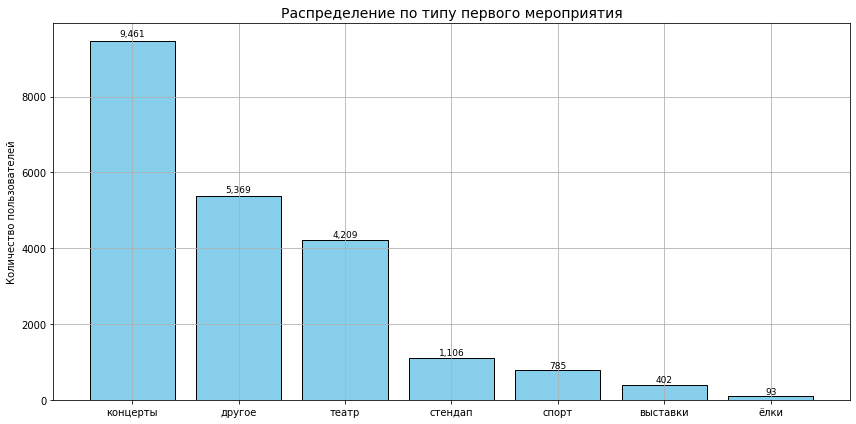

In [51]:
#График по типу первого мероприятия
plt.figure(figsize=(12, 6))
plt.bar(first_event_stats['first_event_type'], first_event_stats['count_users'], color='skyblue', edgecolor='black')
plt.title('Распределение по типу первого мероприятия', fontsize=14)
plt.ylabel('Количество пользователей')
plt.xticks()
for i, v in enumerate(first_event_stats['count_users']):
    plt.text(i, v + v*0.01, f'{v:,}', 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.grid()
plt.show()


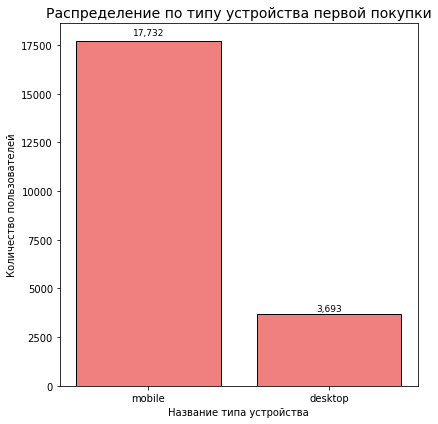

In [52]:
#График по типу устройства
plt.figure(figsize=(6, 6))
plt.bar(device_stats['first_device'], device_stats['count_users'], color='lightcoral', edgecolor='black')
plt.title('Распределение по типу устройства первой покупки', fontsize=14)
plt.ylabel('Количество пользователей')
plt.xlabel('Название типа устройства')
plt.xticks()
for i, v in enumerate(device_stats['count_users']):
    plt.text(i, v + v*0.01, f'{v:,}', 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


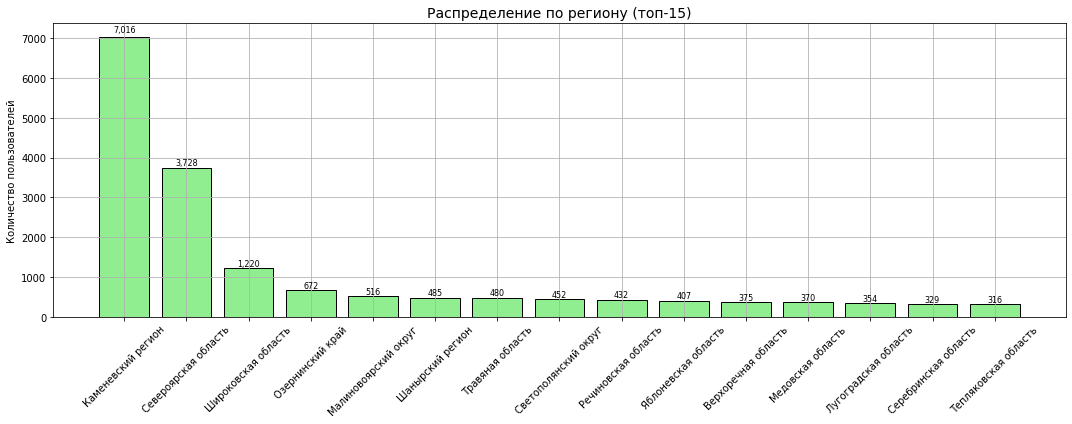

In [53]:
#График по региону (топ-15 для читаемости)
plt.figure(figsize=(15, 6))
top_regions = region_stats.head(15)
plt.bar(top_regions['first_region'], top_regions['count_users'], color='lightgreen', edgecolor='black')
plt.title('Распределение по региону (топ-15)', fontsize=14)
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
for i, v in enumerate(top_regions['count_users']):
    plt.text(i, v + v*0.01, f'{v:,}', 
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

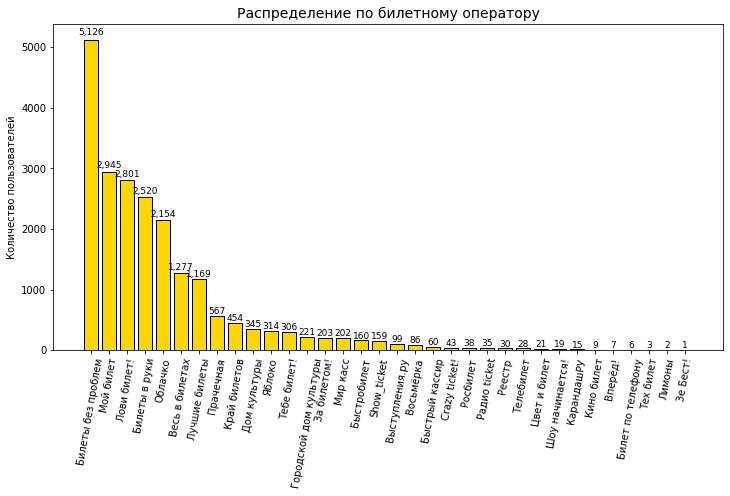

In [54]:
#График по билетному оператору
plt.figure(figsize=(12, 6))
plt.bar(service_stats['first_service_name'], service_stats['count_users'], color='gold', edgecolor='black')
plt.title('Распределение по билетному оператору', fontsize=14)
plt.ylabel('Количество пользователей')
plt.xticks(rotation=80)
for i, v in enumerate(service_stats['count_users']):
    plt.text(i, v + v*0.01, f'{v:,}', 
             ha='center', va='bottom', fontsize=9)
plt.show()

Исходя из полученных результатов и построенных графиков распределения, получаем неравномерное распределение с явными точками входа. Среди типов мероприятий лидируют концерты с значительным отрывом. В устройствах подавляющее большинство пользователей совершают первую покупку с мобильных телефонов - более 17 тысяч против менее 4 тысяч с десктопов. Среди билетных операторов выделяется "билеты без проблем". Географически доминирует Каменевский регион. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно уловила общую суть распределения: оно действительно неравномерное. Основные точки входа определены правильно по всем категориям. Лидерство концертов среди типов мероприятий отмечено верно, как и доминирование мобильных устройств над десктопными. Также ты безошибочно определила самый популярный регион (Каменевский регион) и лидирующего билетного оператора (Билеты без проблем), что полностью соответствует таблицам. Ответ на главный вопрос задания о наличии выраженных «точек входа» дан утвердительный и обоснованный.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Хотя общие выводы верны, стоит быть внимательнее к деталям при описании данных, чтобы избежать неточностей:

1. В выводе ты пишешь, что концерты лидируют «со значительным отрывом». Это правда (44.2%), но категория другое тоже занимает существенную долю (25.1%), и театр имеет весомые 19.6%. Стоит аккуратнее использовать формулировки, чтобы не создавалось впечатление, что остальные категории совсем незначительны.

2. При упоминании мобильных телефонов ты указываешь «более 17 тысяч», что верно (17 732), но для полноты картины можно было бы упомянуть и процентное соотношение (82.8%), так как задание просило подсчитать долю.

3. В части про билетных операторов ты выделила только лидера. Учитывая длинный «хвост» мелких операторов, было бы полезно отметить, что топ-5 операторов забирают более 70% рынка, чтобы лучше проиллюстрировать концентрацию пользователей.

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [55]:
#Функция для расчета доли пользователей, совершивших два и более заказа.
def ratio(groupped_df):
    total_users = groupped_df.size().reset_index(name='total_users')
    users_2 = groupped_df['is_two'].sum().reset_index(name='users_more2_orders')
    
    merged_df = pd.merge(total_users, users_2, on = total_users.columns[0])
    merged_df['ratio_2'] = round(merged_df['users_more2_orders'] / merged_df['total_users'], 4)
    return merged_df.sort_values(by='ratio_2', ascending=False)

In [56]:
event_ratio = ratio(first_event_groupped)
device_ratio = ratio(type_device_forder)
region_ratio = ratio(first_region_groupped)
service_ratio = ratio(service_name_groupped)

In [57]:
#Функция для построения графиков с ограничением в количестве сегментов 
def grafics(name_df, title, top_n=None):
    if top_n:
        df = name_df.head(top_n)
    else:
        df = name_df
    mean_ratio = name_df['ratio_2'].mean()
    plt.figure(figsize=(12, 8))
    bars=plt.barh(df[df.columns[0]], df['ratio_2'], color = ['lightblue' if count >= 50 else 'lightgray' 
              for count in df['total_users']], edgecolor='k')
    for bar, ratio in zip(bars, df['ratio_2']):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{ratio:.3f}', va='center', fontsize=9)
    plt.title(title)
    plt.xlabel('Сегмент')
    plt.ylabel('Доля')
    plt.tight_layout()
    plt.grid()
    plt.axvline(mean_ratio, color='red',
                linestyle='--', linewidth=1,
                label=f'Среднее значение среди долей по сегментам {round(mean_ratio, 4)}')
    plt.legend()
    plt.show()

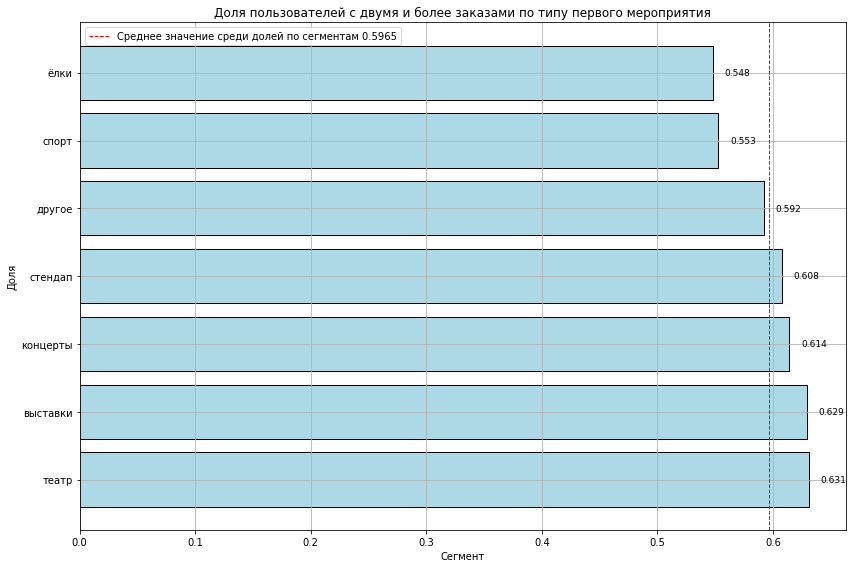

In [58]:
event_grafics = grafics(event_ratio, 'Доля пользователей с двумя и более заказами по типу первого мероприятия')

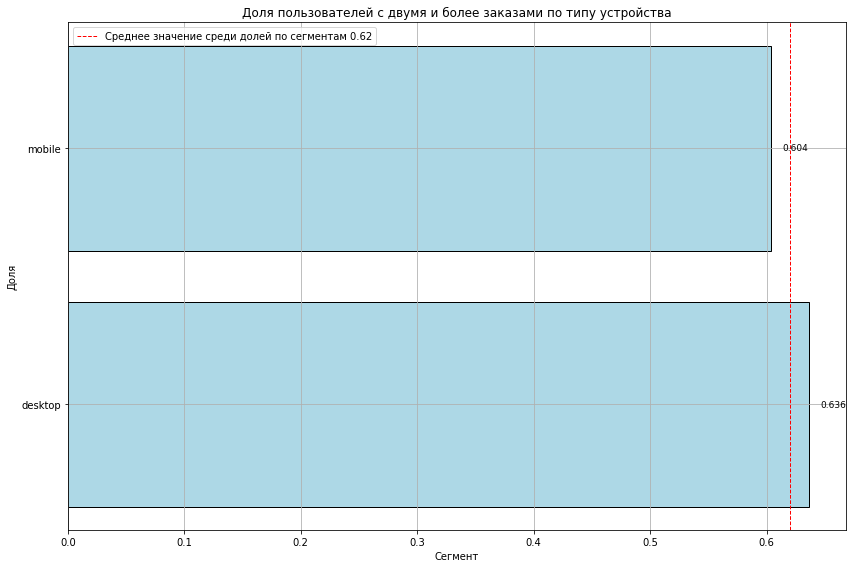

In [59]:
device_grafics = grafics(device_ratio, 'Доля пользователей с двумя и более заказами по типу устройства')

In [60]:
print("Доля возвращающихся по устройствам:")
print(user_new_filtered.groupby('first_device')['is_two'].mean())

Доля возвращающихся по устройствам:
first_device
desktop    0.636068
mobile     0.603880
Name: is_two, dtype: float64


Хоть и mobile преобладает по количеству новых пользователей (первая покупка чаще сделана именно с мобильного устройства), но desktop преобладает по доле пользователей, которые повторно совершают заказы.

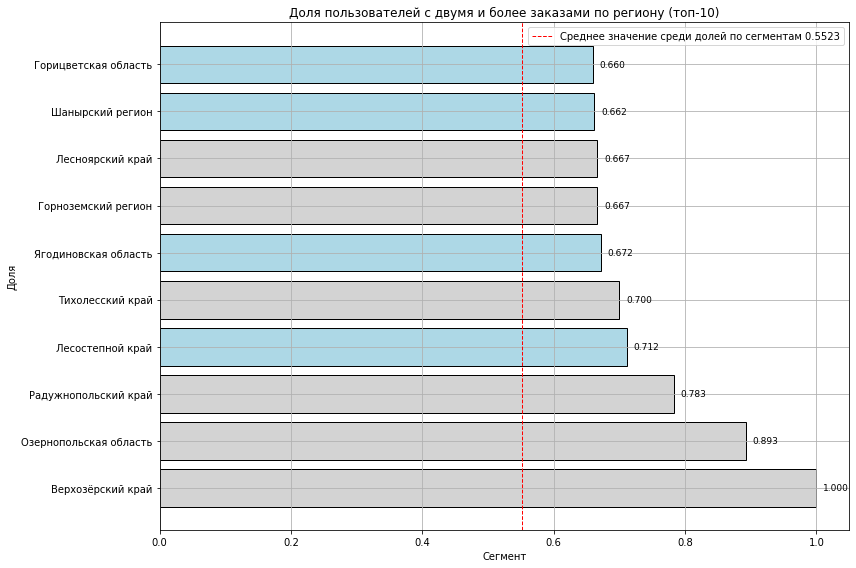

In [61]:
region_grafics = grafics(region_ratio, 'Доля пользователей с двумя и более заказами по региону (топ-10)', top_n=10)

In [62]:
#Функция для вывода регионов, у которых менее 50 пользователей (избавляемся от "выбросов" в виде единичных пользователей)
# max_display - максимальное количество регионов для вывода
#count_us - порог минимального количества пользователей
def show_small_regions(region_stats, max_display=20, count_us=50):
    small_regions = region_stats[region_stats['total_users'] < count_us]
    
    if small_regions.empty:
        print(f"Регионов с количеством пользователей меньше {count_us} не найдено")
        return

    small_regions_sorted = small_regions.sort_values('total_users', ascending=False)
    
    print(f"Регионы с количеством пользователей меньше {count_us}:")
    print(f"Всего таких регионов: {len(small_regions)}")

    display_regions = small_regions_sorted.head(max_display)
    
    for i, (_, row) in enumerate(display_regions.iterrows(), 1):
        print(f"{i:2d}. {row['first_region']:30} {row['total_users']:3d}")
    
    # Если регионов больше, чем max_display
    if len(small_regions) > max_display:
        print(f"Не вошло в ограниченный вывод {len(small_regions) - max_display} регионов")

show_small_regions(region_ratio, max_display=20, count_us=50)

Регионы с количеством пользователей меньше 50:
Всего таких регионов: 39
 1. Кристаловская область           48
 2. Голубевский округ               47
 3. Поленовский край                44
 4. Речицкая область                41
 5. Зеленоградский округ            41
 6. Ключеводский округ              41
 7. Луговая область                 39
 8. Дальнезорский край              35
 9. Каменичская область             31
10. Североозёрский округ            30
11. Сосновская область              30
12. Нежинская область               30
13. Островная область               30
14. Озернопольская область          28
15. Златопольский округ             28
16. Серебряноярский округ           27
17. Горноземский регион             27
18. Радужнопольский край            23
19. Берестовский округ              22
20. Белоярская область              20
Не вошло в ограниченный вывод 19 регионов


Таким образом, регионы, выделенные серым, означают, что в нём количество пользователей мене 50. Поэтому есть приближенные к 1 доли. 

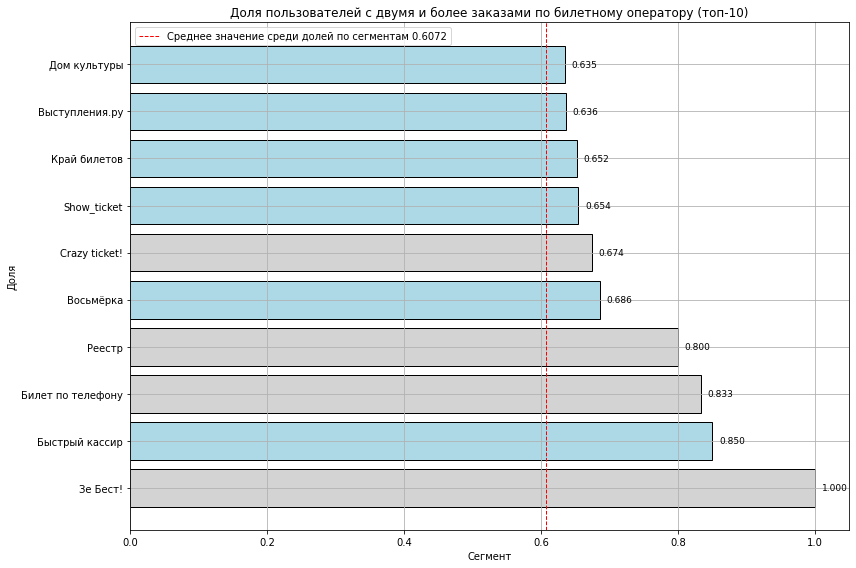

In [63]:
service_grafics = grafics(service_ratio, 'Доля пользователей с двумя и более заказами по билетному оператору (топ-10)', 
                          top_n=10)

In [64]:
def show_small_segments(segment_stats, max_display=20, count_us=50):
    small_segments = segment_stats[segment_stats['total_users'] < count_us]

    small_segments_sorted = small_segments.sort_values('total_users', ascending=False)

    display_segments = small_segments_sorted.head(max_display)
    
    for i, (_, row) in enumerate(display_segments.iterrows(), 1):
        segment_name = row[segment_stats.columns[0]] 
        print(f"{i:2d}. {segment_name:30} {row['total_users']:3d}")

show_small_segments(service_ratio, max_display=20, count_us=50)

 1. Crazy ticket!                   43
 2. Росбилет                        38
 3. Радио ticket                    35
 4. Реестр                          30
 5. Телебилет                       28
 6. Цвет и билет                    21
 7. Шоу начинается!                 19
 8. КарандашРУ                      15
 9. Кино билет                       9
10. Вперёд!                          7
11. Билет по телефону                6
12. Тех билет                        3
13. Лимоны                           2
14. Зе Бест!                         1


Из 14 билетных операторов с менее 50 пользователями только 3 приближаются к статистически значимому порогу. Все они будут помечены серым цветом на графике, чтобы не учитывать их при анализе точек входа.

Чаще возвращаются на Яндекс Афишу, посещающие выставки, театры и концерты (более 60% тех, кто совершил 2 и более заказа). Такие пользователи совершают покупки с десктопных устройств (более 62%). Самым популярным регионом таких пользователей является лесостепной край, далее ягодиновская область, горицветская область (все они также выше 62%). Билетный оператор "быстрый кассир" лидирует среди "восьмёрка", "show_ticket": доля пользователей, совершивших покупки у этого оператора 85%.

В выборке есть успешные «точки входа»: стоит обратить внимание на выставки, концерты, театры и стендапы, поскольку чаще пользователи совершают покупки именно на эти категории мероприятий с десктопных устройств (возможно покупка именно с такого типа устройств обусловлена: 
- запланированная покупка (с мобильного покупки могут быть "импульсивного" характера)
- на компьютере удобнее сравнивать мероприятия нежели на телефоне
- удобнее изучать программу мероприятия на большом экране.

Выше среднего по доле повторных заказов по регионам можно выделить: лесостепной край, ягодиновскую область, горицветскую область, шаныркский регион и так далее. Больше всего обращаются к следующим билетным операторам: быстрый кассир, восьмёрка, show_ticket и так далее. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты проделала отличную работу с данными, особенно в части фильтрации статистических выбросов. Идея отсечь сегменты с малым количеством пользователей (менее 50) и визуально пометить их серым цветом на графиках - это очень профессиональный подход. Это позволяет не делать ложных выводов на основе случайных показателей мелких операторов или регионов.

Графики построены грамотно: есть сортировка, линия среднего значения помогает сразу оценить эффективность сегментов относительно общей картины.

Выводы по типам устройств логичны и интересны: ты верно подметила, что хотя мобильный трафик дает больше первых покупок, десктопные пользователи демонстрируют более высокую лояльность. Гипотезы о причинах этого (планирование досуга, удобство выбора на большом экране) звучат убедительно.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Ты перечисляешь выставки, концерты, театры и стендап как успешные точки входа. Однако на графике видно, что стендап превышает среднее значение совсем незначительно, тогда как театр и выставки имеют гораздо более сильный отрыв. Имеет смысл разделять «сильные» точки входа и те, что находятся на грани среднего уровня.

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [65]:
#Проверка гипотезы 1
sport_two = user_new_filtered[user_new_filtered['first_event_type'] =='спорт']['is_two'].mean()
concert_two = user_new_filtered[user_new_filtered['first_event_type'] =='концерты']['is_two'].mean()
print(f"Доля возвращающихся на спорт: {sport_two:.3f}")
print(f"Доля возвращающихся на концерты: {concert_two:.3f}")
if sport_two > concert_two:
    print('Гипотеза 1 подтверждена!')
else:
    print('Гипотеза 1 опровергнута!')

Доля возвращающихся на спорт: 0.553
Доля возвращающихся на концерты: 0.614
Гипотеза 1 опровергнута!


In [66]:
#Медианное значение количества пользователей по регионам
median_users = user_new_filtered['first_region'].value_counts().median()

region_retention = user_new_filtered.groupby('first_region').agg({
    'user_id': 'count',
    'is_two': 'mean'
}).reset_index()

active_regions = region_retention[region_retention['user_id'] > median_users]
less_active_regions = region_retention[region_retention['user_id'] <= median_users]

active_retention = active_regions['is_two'].mean()
less_active_retention = less_active_regions['is_two'].mean()

print(f"Доля активных регионов: {active_retention:.3f}")
print(f"Доля менее активных регионов: {less_active_retention:.3f}")

if active_retention > less_active_retention:
    print('Гипотеза 2 подтверждена!')
else:
    print('Гипотеза 2 опровергнута!')

Доля активных регионов: 0.589
Доля менее активных регионов: 0.517
Гипотеза 2 подтверждена!


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты правильно интерпретировала результаты проверки обеих гипотез. Сравнение долей возвращающихся пользователей проведено корректно: для первой гипотезы четко видно, что показатель у концертов выше, чем у спорта, поэтому вывод об опровержении гипотезы верный.

Вторая гипотеза также проверена логично. Ты обоснованно подтвердила, что в активных регионах доля повторных заказов выше. Текстовые выводы содержат не только сухую констатацию факта («подтверждена/опровергнута»), но и отличные качественные пояснения причин. Мысль про инфраструктуру и культуру посещения событий в активных регионах - очень меткое наблюдение, добавляющее ценность анализу.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В выводе не показан сам процесс разделения регионов на «активные» и «менее активные». В коде или пояснении стоило бы указать критерий этого разделения (например, медиана по количеству пользователей или конкретный порог входа), чтобы читатель понимал, где проходит граница между этими группами.

В выводе по первой гипотезе ты пишешь: «пользователи, начавшие с концертов, имеют более высокую вероятность повторного заказа». Это верно, но для полноты картины можно было бы добавить, что разница между этими долями довольно заметна (около 6 процентных пунктов), что делает вывод статистически более устойчивым.

Пользователи, начавшие с концертов, имеют более высокую вероятность повторного заказа: доля возвращающихся на спорт ниже на 6%, чем доля возвращающихся на концерт. Таким образом, гипотеза 1 не подтвердилась - спортивные мероприятия не являются более эффективным "входным" продуктом для удержания клиентов.

Разделение на "активные" и "менее активные" регионы проводилось посредством выделения медианы по количеству пользователей. Те, кто был ниже медианного значения, относятся к "менее активному" региону, те, кто выше, - к "активному". Таким образом, в регионах с высокой пользовательской активностью действительно формируется более лояльная пользовательская база. Это может быть связано с лучшей инфраструктурой, большим выбором мероприятий или более развитой культурой посещения событий.

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для более наглядного сравнения гистограммы следует наложить друг на друга и подписать группу с помощью легенды.

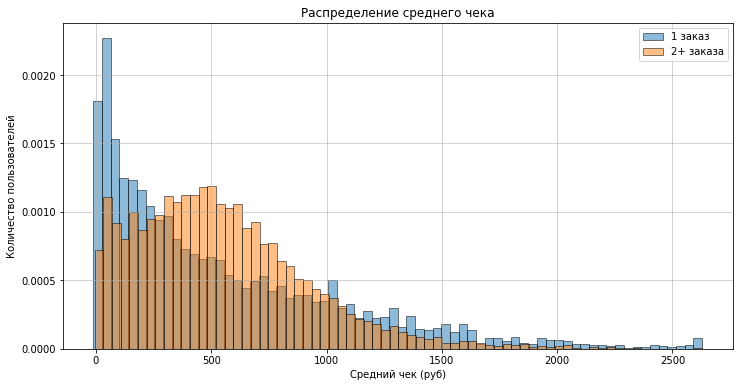

In [67]:
one_order = user_new_filtered[user_new_filtered['total_orders']==1]
more_two_order = user_new_filtered[user_new_filtered['total_orders'] >= 2]

plt.figure(figsize=(12, 6))
plt.hist(one_order['avg_revenue_rub'], bins=70, alpha=0.5, edgecolor='black', density=True, label='1 заказ')
plt.hist(more_two_order['avg_revenue_rub'], bins=70, edgecolor='black', density=True, alpha=0.5, label='2+ заказа')
plt.title('Распределение среднего чека')
plt.xlabel('Средний чек (руб)')
plt.ylabel('Количество пользователей')
plt.grid(alpha=0.7)
plt.legend()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно интерпретировала форму распределений. Отмечено главное отличие: несмотря на то, что бюджетный сегмент популярен у всех, лояльные пользователи действительно чаще делают покупки в более дорогом диапазоне (от 500 рублей и выше). Вывод о «длинном хвосте» и более высокой платежеспособности возвращающихся клиентов логичен и подтверждается визуально (на втором графике «горб» распределения заметно шире).

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В тексте ты указываешь диапазон 0-500 рублей как пиковый для обеих групп. Это верно, но если присмотреться, у лояльных пользователей плато высокой плотности продолжается почти до 1000 рублей, тогда как у разовых резкий спад начинается уже после 300-400 рублей. Это наблюдение можно было бы усилить.

Лояльные клиенты (совершившие 2 и более заказа) демонстрируют более разнообразную ценовую структуру покупок и включают значительную долю клиентов со средними чеками 500-1000 рублей, в то время как разовые клиенты концентрируются преимущественно в бюджетном сегменте 0-500 рублей.

Пик распределения у обеих групп приходится на низкий ценовой сегмент (0-500 рублей), однако у группы с повторными покупками имеет более выраженный "хвост" в области средних и выше среднего чеков, что составляет почти 1000 рублей. У группы с разовыми покупками пик приходится на 300-400 рублей, а до 500 рублей приходится спад количества пользователей.

Это указывает на то, что лояльные клиенты не только совершают больше покупок, но и среди них присутствует значительная прослойка клиентов с более высокой платёжеспособностью или склонностью к более дорогим покупкам. 

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут не очень понятна логика статусов - ты сравниваешь 2+ и 5+ вместо 2-4 и 5+. Для выделения группы 2-4 с помощью флагов условия должно быть два: is_two=True и is_five=False.

In [68]:
two = user_new_filtered[(user_new_filtered['is_two']==1) & (user_new_filtered['is_five']==0)]['user_id'].count()
five = user_new_filtered[user_new_filtered['is_five']==1]['user_id'].count()
print('Количество пользователей совершивших 2 и более заказов: ', two)
print('Количество пользователей совершивших 5 и более заказов: ', five)

Количество пользователей совершивших 2 и более заказов:  7147
Количество пользователей совершивших 5 и более заказов:  5910


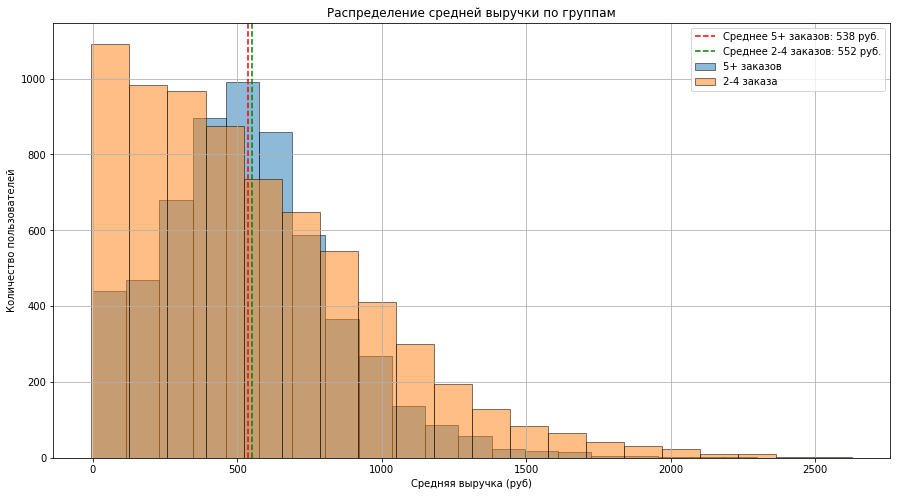

In [69]:
group_0 = user_new_filtered[user_new_filtered['is_five'] == 1]['avg_revenue_rub']
group_1 = user_new_filtered[(user_new_filtered['is_two'] == 1)  & (user_new_filtered['is_five'] == 0)]['avg_revenue_rub']

plt.figure(figsize=(15, 8))
plt.hist(group_0, bins=20, alpha=0.5, label='5+ заказов', edgecolor='black')
plt.hist(group_1, bins=20, alpha=0.5, label='2-4 заказа', edgecolor='black')

plt.axvline(group_0.mean(), color='red', linestyle='--', label=f'Среднее 5+ заказов: {group_0.mean():.0f} руб.')
plt.axvline(group_1.mean(), color='green', linestyle='--', label=f'Среднее 2-4 заказов: {group_1.mean():.0f} руб.')

plt.title('Распределение средней выручки по группам')
plt.xlabel('Средняя выручка (руб)')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid()
plt.show()


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Выводы нужно будет обновить после корректного разделения на группы.

Анализ распределения средне выручки по группам показывает, что для группы 2-4 заказа средняя выручка составляет 552 рубля, по сравнению с 5 и более закзаами (538 рублей). Распределение выручки для группы с 2-4 заказами имеет более выраженный правый хвост по сравнению с группой 5+ заказов (значения средней выручки распределяются от 0 - 1500, в то время как у пользователей с 5 и более заказами от 0 - 1000).

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [70]:
user_new_filtered['avg_tickets_count'].describe()

count    21425.000000
mean         2.743580
std          0.921827
min          1.000000
25%          2.000000
50%          2.750000
75%          3.111111
max         11.000000
Name: avg_tickets_count, dtype: float64

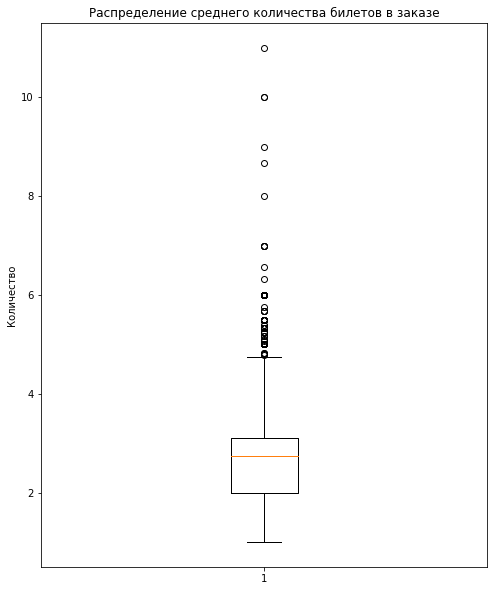

In [71]:
plt.figure(figsize=(8, 10))
plt.boxplot(user_new_filtered['avg_tickets_count'])
plt.title('Распределение среднего количества билетов в заказе')
plt.ylabel('Количество')
plt.show()

In [72]:
user_new_filtered[user_new_filtered['avg_tickets_count']==11]['user_id'].count()

1

В распределении среднего количества билетов в заказе присутсвуют аномальные значения (5 и более), где максимум достигает 11. Возможно это групповая покупка или корпоративный заказ, поэтому не будем его никак обрабатывать. Такое количество вполне реально. 

Более 6 билетов - это разовая покупка, а не систематическая. 

In [73]:
user_new_filtered = user_new_filtered.copy()
user_new_filtered['ticket_segment'] = pd.cut(user_new_filtered['avg_tickets_count'], 
                        bins = [1, 2, 3, 5, user_new_filtered['avg_tickets_count'].max()+1], 
                        labels = ["1-2 билета", "2-3 билета", "3-5 билетов", "5+ билетов"])


In [74]:
group_tickets = user_new_filtered.groupby('ticket_segment')
count_users = group_tickets['user_id'].count()
ratio_users = group_tickets['is_two'].mean()
print('Количество пользователей\n', count_users)
print('Доля пользователей, совершивших повторные заказы\n', ratio_users)

Количество пользователей
 ticket_segment
1-2 билета     4822
2-3 билета     9730
3-5 билетов    5341
5+ билетов      194
Name: user_id, dtype: int64
Доля пользователей, совершивших повторные заказы
 ticket_segment
1-2 билета     0.479676
2-3 билета     0.737410
3-5 билетов    0.626474
5+ билетов     0.324742
Name: is_two, dtype: float64


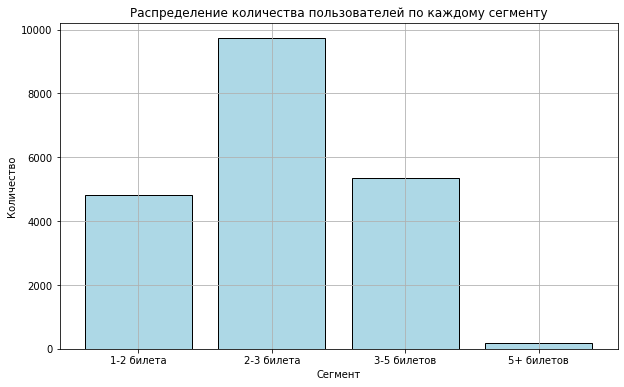

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(count_users.index, count_users.values, color='lightblue', edgecolor='k')
plt.title('Распределение количества пользователей по каждому сегменту')
plt.xlabel('Сегмент')
plt.ylabel('Количество')
plt.grid()
plt.show()

Самым ходовым и часто используемым средним количеством билетов является сегмент "2-3 билета" (9730): пользователи чаще ходят парами или небольшими компаниями. Более крупные покупки не так популярны - 3-5 билетов (5341). Более 5 билетов составляют 194.

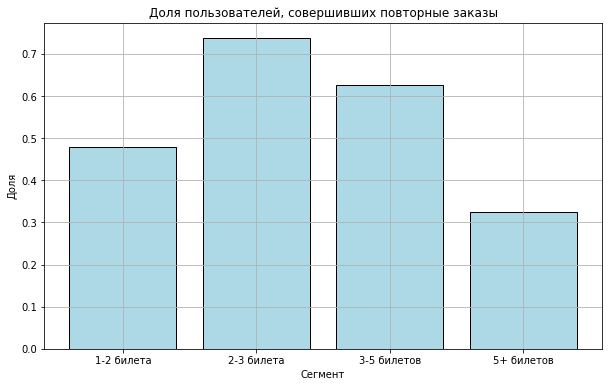

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(ratio_users.index, ratio_users.values, color='lightblue', edgecolor='k')
plt.title('Доля пользователей, совершивших повторные заказы')
plt.xlabel('Сегмент')
plt.ylabel('Доля')
plt.grid()
plt.show()

По графику можем отметить, что более 70% пользователей совершают повторные покупки: возможно это семейные пары или небольшие компании друзей. Сегмент из 5+ билетов вероятно состоит из групповых или корпоративных покупок, которые не являются регулярными. Пользователи, совершившие покупку 1 билета, составляют менее 50% пользователей, возможно это разовые покупки на новые форматы мероприятий.

Пользователи распределены по сегментам неравномерно: среднее количество 2-3 билетов = 9730, хотя как у остального количества значения ниже 6000. Сегмент 5+ билетов является самым непопулярным - количество пользователей, совершивших такие покупки, 194, что по сравнению с другими значениями, очень мало. 

Сегмент 2-3 билета демонстрирует высокую долю повторных покупок (более 70%): вероятно это небольшие группы людей, регулярно посещающие различные мероприятия. Сегмент 5+ билетов показывают низкую долю повторных покупок (менее 35%): вероятно это связано с разовым сбором рабочего коллектива или организованной группы. Это не приводит к формированию постоянной привычки или лояльности.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты продемонстрировала зрелый аналитический подход, решив не удалять выбросы (заказы с большим количеством билетов). Твоя аргументация о том, что это могут быть реальные корпоративные или групповые заказы, абсолютно верна. В бизнесе такие «киты» часто приносят существенную выручку, и игнорировать их нельзя.

Выводы по сегментам получились глубокими. Ты верно нащупала «золотую середину» лояльности - сегмент 2-3 билета. Гипотезы о портрете пользователей (пары/друзья - регулярный досуг, большие группы - разовые корпоративы, одиночки - проба сервиса) звучат очень логично и хорошо объясняют цифры.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В описании выбросов ты пишешь: «Наблюдается выброс в виде максимального количества, равного 11». Глядя на боксплот, видно, что это не единичный случай. Кружочки (выбросы) начинаются примерно от 5 билетов и идут плотной цепочкой до 11. То есть правильнее сказать, что существует целая группа пользователей с аномально высоким количеством билетов, где 11 - это просто максимум.

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [77]:
user_new_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21425 entries, 0 to 21853
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  21425 non-null  object        
 1   first_order_date         21425 non-null  datetime64[ns]
 2   last_order_date          21425 non-null  datetime64[ns]
 3   total_orders             21425 non-null  int64         
 4   avg_revenue_rub          21425 non-null  float64       
 5   avg_tickets_count        21425 non-null  float64       
 6   avg_days_between_orders  13084 non-null  Float64       
 7   first_device             21425 non-null  object        
 8   first_region             21425 non-null  object        
 9   first_service_name       21425 non-null  object        
 10  first_event_type         21425 non-null  object        
 11  is_two                   21425 non-null  int64         
 12  is_five                  21425 n

In [78]:
df_copy = user_new_filtered.copy()
df_copy['day_name_f_order'] = df_copy['first_order_date'].dt.day_name()
df_copy['lifetime'] = df_copy['last_order_date'] - df_copy['first_order_date']
repeat_customers = df_copy[df_copy['total_orders'] > 1]
interval_analysis = repeat_customers['avg_days_between_orders'].describe()

# Анализ по сегментам количества заказов
interval_by_orders = df_copy.groupby('total_orders')['avg_days_between_orders'].mean()

display(df_copy['day_name_f_order'].head(10))
display(df_copy['lifetime'].head(10))
display(interval_by_orders)

0     Tuesday
1     Tuesday
2    Saturday
3    Thursday
4      Sunday
5    Thursday
6     Tuesday
7    Thursday
8      Monday
9    Thursday
Name: day_name_f_order, dtype: object

0     0 days
1    75 days
2   102 days
3     0 days
4    16 days
5     1 days
6     0 days
7     0 days
8     0 days
9    87 days
Name: lifetime, dtype: timedelta64[ns]

total_orders
1      38.37037
2     24.475364
3     19.218238
4     16.585298
5     15.640989
        ...    
76     1.724444
77     1.759398
78     1.847866
79      1.40812
80     1.787342
Name: avg_days_between_orders, Length: 80, dtype: Float64

Нет явного доминирования одного конкретного дня недели для первых покупок. Это может указывать на:
- Равномерное привлечение клиентов в течение недели
- Отсутствие сильной сезонности по дням недели

Сильная вариативность - от 0 до 102 дней:
- Значительное количество "однодневных" клиентов (0 дней)
- От однократных покупок до стабильных клиентов (75-102 дня)

Также по среднему интервалу между покупками пользователей с повторными заказами, можно сделать вывод о том что, чем больше заказов у клиента, тем меньше времени проходит между покупками. 

In [79]:
count_us_day_week = user_new_filtered.groupby(user_new_filtered['first_order_date'].dt.day_of_week)['user_id'].count()
ratio_us_day_week = user_new_filtered.groupby(user_new_filtered['first_order_date'].dt.day_of_week)['is_two'].mean()
print('Общее число пользователей\n', count_us_day_week)
print('='*50)
print('Доля пользователей, совершивших повторные заказы\n', ratio_us_day_week)

Общее число пользователей
 first_order_date
0    2895
1    3148
2    3040
3    3101
4    3243
5    3258
6    2740
Name: user_id, dtype: int64
Доля пользователей, совершивших повторные заказы
 first_order_date
0    0.625907
1    0.615629
2    0.619737
3    0.592712
4    0.596361
5    0.620319
6    0.594891
Name: is_two, dtype: float64


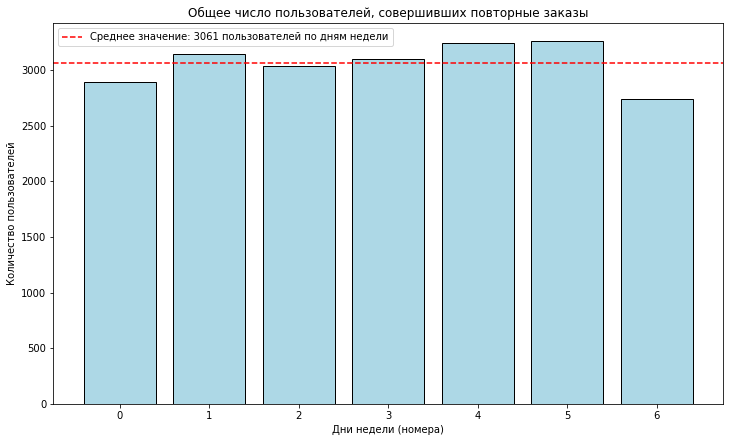

In [80]:
plt.figure(figsize=(12,7))
plt.bar(count_us_day_week.index, count_us_day_week.values, color='lightblue', edgecolor='black')
plt.axhline(count_us_day_week.mean(), color='red', linestyle='--', 
            label=f'Среднее значение: {count_us_day_week.mean():.0f} пользователей по дням недели')
plt.title('Общее число пользователей, совершивших повторные заказы')
plt.xlabel('Дни недели (номера)')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

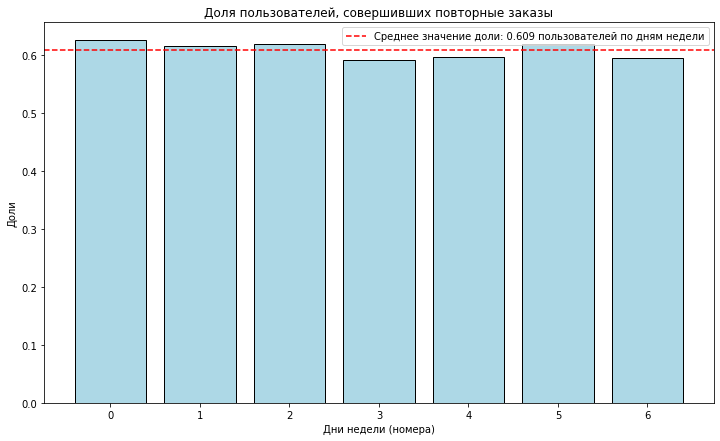

In [81]:
plt.figure(figsize=(12,7))
plt.bar(ratio_us_day_week.index, ratio_us_day_week.values, color='lightblue', edgecolor='black')
plt.axhline(ratio_us_day_week.mean(), color='red', linestyle='--', 
            label=f'Среднее значение доли: {ratio_us_day_week.mean():.3f} пользователей по дням недели')
plt.title('Доля пользователей, совершивших повторные заказы')
plt.xlabel('Дни недели (номера)')
plt.ylabel('Доли')
plt.legend()
plt.show()

Поведение пользователей, совершающих повторные заказы, не имеет сильной зависимости от дня недели, когда был сделан их первый заказ. Однако наблюдаются значительные различия в общем количестве новых пользователей в разные дни.

Более 60% пользователей совершают повторные заказы, которые не зависит от дня привлечения клиента.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно ответила на главный вопрос задачи: день недели первой покупки практически не влияет на удержание клиента. График с долями очень наглядно это подтверждает - столбики выстроились в ровную линию, и отклонения от среднего минимальны. Использование красной пунктирной линии для среднего значения - отличный прием, он сразу помогает считать результат без вчитывания в цифры.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> На графиках по оси X остались технические обозначения дней недели (от 0 до 6). Для презентации результатов лучше заменять их на понятные текстовые метки (Пн, Вт, Ср...), чтобы зрителю не приходилось в уме переводить цифры в дни.

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [82]:
group_two = user_new_filtered[(user_new_filtered['is_two'] == 1) & (user_new_filtered['is_five'] == 0)]
group_five = user_new_filtered[user_new_filtered['is_five'] == 1]

avg_2 = group_two['avg_days_between_orders'].mean().round(3)
avg_5 = group_five['avg_days_between_orders'].mean().round(3)
print(f"Среднее время между заказами для группы 2-4 заказа: {avg_2} дней")
print(f"Среднее время между заказами для группы 5+ заказов: {avg_5} дней")

Среднее время между заказами для группы 2-4 заказа: 21.33 дней
Среднее время между заказами для группы 5+ заказов: 10.209 дней


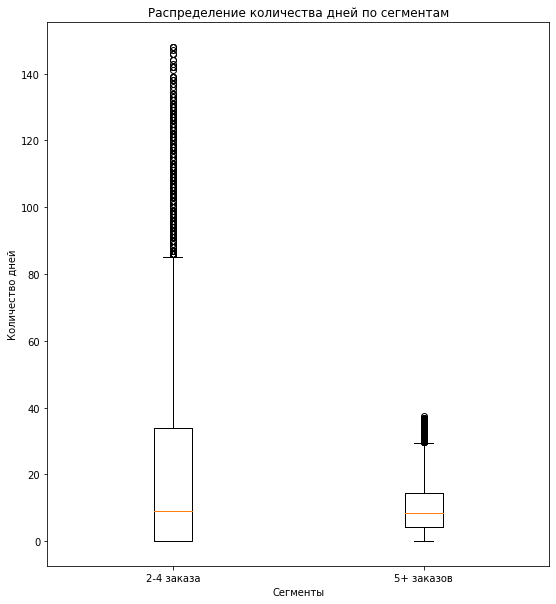

In [83]:
plt.figure(figsize=(9, 10))
box_plot = plt.boxplot([group_two['avg_days_between_orders'].dropna(), 
                group_five['avg_days_between_orders'].dropna()], labels=['2-4 заказа', '5+ заказов'])
plt.title('Распределение количества дней по сегментам')
plt.xlabel('Сегменты')
plt.ylabel('Количество дней')
plt.show()

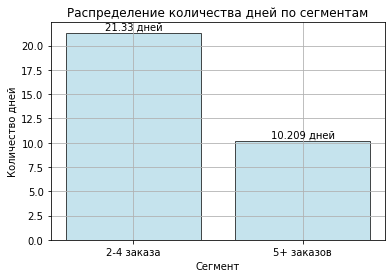

In [84]:
groups = ['2-4 заказа', '5+ заказов']
values = [avg_2, avg_5]

plt.bar(groups, values, color='lightblue', edgecolor='black', alpha=0.7)
for i, v in enumerate(values):
    plt.text(i, v + 0.1, f'{v} дней', ha='center', va='bottom')
plt.title('Распределение количества дней по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество дней')
plt.grid()
plt.show()

Графики наглядно показывают, что кратковременная вспышка очень высокой активности не равна долгосрочной лояльности. Устойчивая лояльность связана скорее с постоянством, а не с максимальной частотой.
Более длинный и стабильный интервал характерен для клиентов с более устойчивой привычкой посещать мероприятия и более высоким потенциалом для совершения повторных заказов в долгосрочной перспективе.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Техническая часть задания по расчету среднего интервала выполнена верно. Ты правильно разделила пользователей на две когорты и вычислила среднее время между их транзакциями. Столбчатая диаграмма наглядно показывает разницу в частоте покупок между сегментами.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Здесь есть важная логическая ошибка в интерпретации, которая могла возникнуть из-за путаницы с предыдущей задачей:

Ты делаешь вывод, что пользователи с 5 и более заказами проявляют «кратковременную вспышку», а не долгосрочную лояльность. В продуктовой аналитике это работает ровно наоборот: пользователь, совершивший 5 и более отдельных заказов (с интервалом в 10 дней) - это твой самый лояльный и активный клиент (Super User). Частые покупки - это признак сформированной привычки, а не «вспышки». Вероятно, ты перенесла выводы из предыдущей задачи, где анализировались «5+ билетов в одном заказе» (оптовые покупки, которые действительно часто бывают разовыми). Но здесь речь идет о количестве заказов. Чем их больше и чем короче интервал между ними, тем сильнее удержание.

В задании также требовалось исследовать, как интервал влияет на вероятность повторного заказа (удержание). Ты рассчитала только сам интервал (дни), но не привела цифры по Retention Rate или доле возврата для этих конкретных групп. Без этих цифр вывод о том, какая группа «более устойчива», является необоснованным предположением. Нужно добавить расчет долей возврата для этих двух сегментов, чтобы подтвердить или опровергнуть гипотезу.

In [85]:
count_2_4 = user_new_filtered[(user_new_filtered['is_two'] == 1) & (user_new_filtered['is_five'] == 0)]['user_id'].count()
count_5 = user_new_filtered[user_new_filtered['is_five'] == 1]['user_id'].count()
all_counts = user_new_filtered['user_id'].count()
print(count_2_4, count_5, all_counts)

7147 5910 21425


In [86]:
print('Вероятность возвращения пользователей с 2-4 заказами = ', round(count_2_4/all_counts, 3))
print('Вероятность возвращения пользователей с 5 и более заказами = ', round(count_5/all_counts, 3))

Вероятность возвращения пользователей с 2-4 заказами =  0.334
Вероятность возвращения пользователей с 5 и более заказами =  0.276


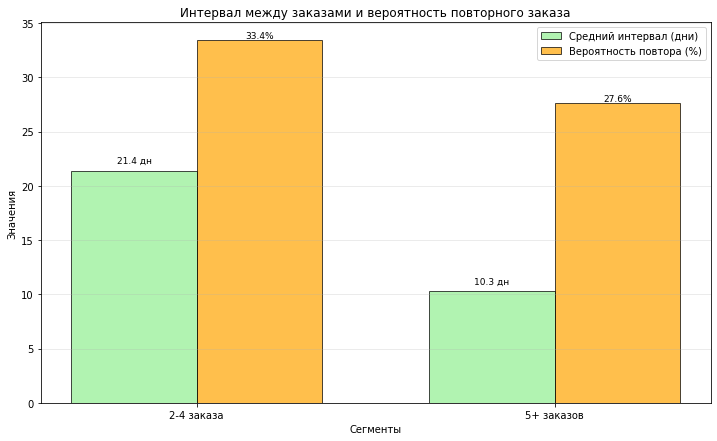

In [92]:
x = np.arange(2)
width = 0.35
intervals = [21.4, 10.3]
rotation = [33.4, 27.6]

plt.figure(figsize=(12,7))

bars = plt.bar(x - width/2, intervals, width, label='Средний интервал (дни)', 
                color='lightgreen', edgecolor='black',alpha=0.7)
bars1 = plt.bar(x + width/2, rotation, width, label='Вероятность повтора (%)', 
                color='orange', edgecolor='black',alpha=0.7)

for bar, value in zip(bars, intervals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value} дн', ha='center', va='bottom', fontsize=9)
    
for bar, value in zip(bars1, rotation):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{value}%', ha='center', va='bottom', fontsize=9)
plt.xlabel('Сегменты')
plt.ylabel('Значения')
plt.title('Интервал между заказами и вероятность повторного заказа')
plt.xticks(x, ['2-4 заказа', '5+ заказов'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Анализируя распределение количества дней по сегментам и вероятности повторного заказа, можно сделать вывод о том, что при наименьшем интервале между заказами (10.3 дней) вероятность возвращения составляет 27.6%, в то время как более длительный интервал (21.4 дней) показывает большую вероятность возвращения в 33.4%. Получается, что длительная периодичность между заказами более устойчива к возвращению покупателей, нежели частая.

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> В `interval_cols` передаём только непрерывне признаки, а не все численные.

In [93]:
interval_cols = ['total_orders', 'avg_revenue_rub', 'avg_tickets_count', 'avg_days_between_orders']
copy_df = user_new_filtered[interval_cols].copy()
corel_matrix = copy_df.phik_matrix(interval_cols=interval_cols)
display(corel_matrix)

,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between_orders
total_orders,1.000000,0.249488,0.256983,0.365032
avg_revenue_rub,0.249488,1.000000,0.456940,0.094270
avg_tickets_count,0.256983,0.456940,1.000000,0.095480
avg_days_between_orders,0.365032,0.094270,0.095480,1.000000


Text(0.5, 1.0, 'Матрица корреляции Phik')

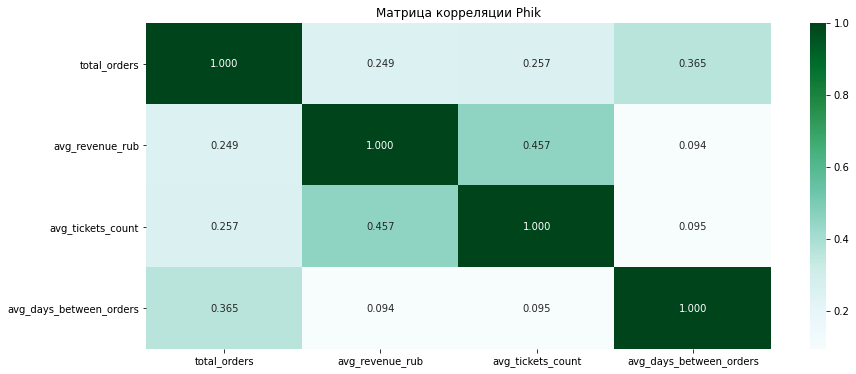

In [94]:
#Визуализируем
plt.figure(figsize=(14, 6))
sns.heatmap(corel_matrix, cmap='BuGn', annot=True, fmt='.3f')
plt.xticks()
plt.title('Матрица корреляции Phik')

На пересечении avg_days_between_orders с avg_revenue_rub и avg_tickets_count получились значения, приближенные к 0. Нулевая корреляция говорит о том, что периодичность покупок не определяет их стоимость или объем. Это здоровый признак разнообразной пользовательской базы, где разные стратегии покупок сосуществуют.

То есть avg_revenue_rub никак не зависит от разницы в датах между заказами, так же как и avg_tickets_count, поскольку:
- Частота покупок определяется лояльностью, регулярностью потребления
- Средний чек определяется доходом, ценовой чувствительностью, категорией товаров
- Количество билетов определяется размером компании, типом мероприятия, планами

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты технически верно построила матрицу корреляции Phik и визуализировала её с помощью тепловой карты. Цветовая шкала выбрана удачно, значения считываются легко.

Очень грамотным получился блок про отсутствие связи между средним чеком, количеством билетов и интервалом между покупками. Ты верно заметила, что это признаки «здоровой» и разнообразной базы, где нет жесткой зависимости «чем чаще ходишь, тем меньше тратишь» или наоборот. Это отличный продуктовый вывод.

Самой сильной связью с количеством заказов total_orders является признак avg_days_between_orders (корреляция составляет 0.365). Следовательно, можем сделать вывод о том, что количество заказов имеет сильную связь с интервалом между заказами, чем со средним количеством билетов и средним чеком (avg_tickets_count и avg_revenue_rub соответственно). Это может быть обусловлено регулярной "привычкой" совершать заказы, или возвращением спустя несколько дней и делать заказ. То есть лояльность клиентов прямосопоставима с регулярностью покупок.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Есть важный нюанс в интерпретации связей с целевой переменной (total_orders). Ты пишешь, что самая сильная связь - с признаками is_five и is_two. Это верно математически, но с точки зрения аналитики это автокорреляция. Эти признаки созданы на основе самого количества заказов (если заказов >= 5, то is_five = 1). То есть ты коррелируешь переменную саму с собой (или её производной). Это очевидная связь, которая не дает нового знания о том, что именно влияет на удержание. В реальных задачах такие признаки-спойлеры обычно исключают из анализа факторов влияния.

Стоит обратить внимание на признак avg_days_between_orders. Его корреляция с общим числом заказов составляет 0.365. Это выше, чем у среднего чека и количества билетов. Это важный инсайт: частота покупок (интервал) сильнее связана с лояльностью (количеством заказов), чем денежные показатели (чек). В твоем выводе этот момент упущен, хотя он является самым ценным среди «независимых» факторов.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Структура вывода отличная. Ты прошла по всем пунктам требования: описала данные, прошлась по всем ключевым метрикам (регионы, операторы, устройства, типы мероприятий) и дала конкретные рекомендации.

Особенно удались рекомендации: они не абстрактные («надо работать лучше»), а очень прикладные - ты предлагаешь конкретные механики (семейные абонементы, «приведи друга») для конкретного сегмента (покупатели 2-3 билетов). Это именно то, что хочет видеть заказчик.

Блок с описанием предобработки данных (первый абзац) написан профессионально и четко.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Обрати внимание на цифру среднего количества заказов - 13. Если вспомнить предыдущие шаги, то медиана и мода у нас были в районе 1-2 заказов, а 70% пользователей совершают повторные покупки. Среднее значение 13 выглядит слишком высоким для типичного e-com (обычно это означает, что есть супер-активные «киты», которые тянут среднее вверх, либо в расчет закралась ошибка). Если это реальное среднее, стоит добавить комментарий о сильном перекосе распределения (так как медиана наверняка гораздо ниже).

В части про корреляцию ты снова приводишь метрики is_five и is_two. Как мы обсуждали ранее, это «техническая» связь (автокорреляция). В итоговом выводе для бизнеса лучше делать акцент на менее очевидных вещах. Например, подчеркнуть, что чек не влияет на частоту покупок (что ты и сделала - это отлично), или что интервал между покупками имеет более значимую связь с лояльностью, чем сумма покупки.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Здесь осталась логическая ошибка из предыдущего шага, которая искажает портрет твоего лучшего клиента:

    «При этом кратковременная вспышка активности не гарантирует долгосрочной лояльности» (про клиентов с интервалом 10 дней и 5+ заказами).

Это нужно переписать. Клиент, который сделал 5+ заказов со средним интервалом в 10 дней - это твой самый лояльный пользователь с прочно сформированной привычкой. Это не «вспышка», это паттерн регулярного потребления (ходит в кино/театр каждые выходные). «Вспышка» - это если бы он купил 5 билетов в одном заказе и ушел. А 5 разных заказов с коротким интервалом - это «золотой фонд» базы.

**Информация о данных**

В ходе работы был проанализирован датасет с 287 786 записями о покупках билетов через Яндекс Афишу за период с июня по октябрь 2024 года. Данные были тщательно очищены: приведены к единой валюте (рубли), отфильтрованы аномальные значения выручки (удалено 2 825 записей сверх 99-го перцентиля) и экстремальные случаи количества заказов (удалено 429 записей). Номинальные поля унифицированы, типы данных оптимизированы для эффективного анализа. Пропуски в поле days_since_prev ожидаемы и соответствуют первым заказам пользователей.

**Основные результаты анализа**

Выборка включает разнородную пользовательскую базу со средним количеством заказов 13, что указывает на наличие как разовых покупателей, так и постоянной аудитории. Распределение по типам мероприятий показывает доминирование концертов, при этом 70% пользователей совершают повторные покупки. Географически выделяется Каменевский регион по объему пользователей, однако по лояльности лидируют Лесостепной край, Ягодиновская и Горицветская области с показателем удержания выше 62%.

Анализ выявил значимые закономерности: пользователи, начинающие с концертов, выставок и театров, демонстрируют более высокую вероятность возврата (свыше 60%) по сравнению, например, со спортивными мероприятиями. Устройство первой покупки также играет роль - десктопные пользователи проявляют большую лояльность против мобильных, что может свидетельствовать о более запланированном характере покупок. Среди билетных операторов выделяется "Быстрый кассир" с 85% долей возвращающихся клиентов.

Для группы 2-4 заказа средняя выручка составляет 552 рубля, по сравнению с 5 и более заказами (538 рублей). Распределение выручки для группы с 2-4 заказами имеет более выраженный правый хвост по сравнению с группой 5+ заказов (значения средней выручки распределяются от 0 - 1500, в то время как у пользователей с 5 и более заказами от 0 - 1000). Пик распределения у обеих групп приходится на низкий ценовой сегмент (0-500 рублей), однако у группы с повторными покупками имеет более выраженный "хвост" в области средних и выше среднего чеков, что составляет почти 1000 рублей. У группы с разовыми покупками пик приходится на 300-400 рублей, а до 500 рублей приходится спад количества пользователей.

Распределение первых покупок равномерно в течение недели без выраженной сезонности. При интервале между заказами в 10.3 дней вероятность возвращения составляет 27.6%, в то время как более длительный интервал (21.4 дней) показывает большую вероятность возвращения в 33.4%. Таким образом получается, что длительная периодичность между заказами более устойчива к возвращению покупателей, нежели частая.

Корреляционный анализ подтвердил сильную связь между количеством заказов total_orders и avg_days_between_orders (корреляция составляет 0.365). Таким образом, количество заказов имеет сильную связь с интервалом между заказами, чем со средним количеством билетов и средним чеком (avg_tickets_count и avg_revenue_rub соответственно). То есть лояльность клиентов прямосопоставима с регулярностью покупок.


**Рекомендации**

Сконцентрировать маркетинговые усилия на привлечении через концерты, выставки и театры как наиболее эффективные "точки входа" для формирования лояльной и постоянной аудитории, на сегменте покупателей 2-3 билетов через программы "приведи друзей", семейные/парные/групповые абонементы.
Разработать принципы стимулирования перехода от разовых к регулярным покупкам через систему лояльности, например, с накопительными бонусами.

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

https://github.com/marilapr/analysys_project

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В репозиторий загружены все нужные файлы.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В `README.md` можно было бы также поместить промежуточный вывод по проекту.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> В версии, которую ты заливаешь на `GitHub`, не стоит оставлять параметры подключения в явном виде - это может привести к несанкционированному доступу к данным, что чревато их потереей или изменением. Лучшее решение - локально создать `.env` файл, из которого с помощью `os` эти параметры подключения передаются в код. А файл `.gitignore` поможет не отслеживать этот файл для репозитория.
    
Файл `.env` может выглядеть так:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам с помощью библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)
```
    
Параметры подключения также следует убрать из описания проекта:
    
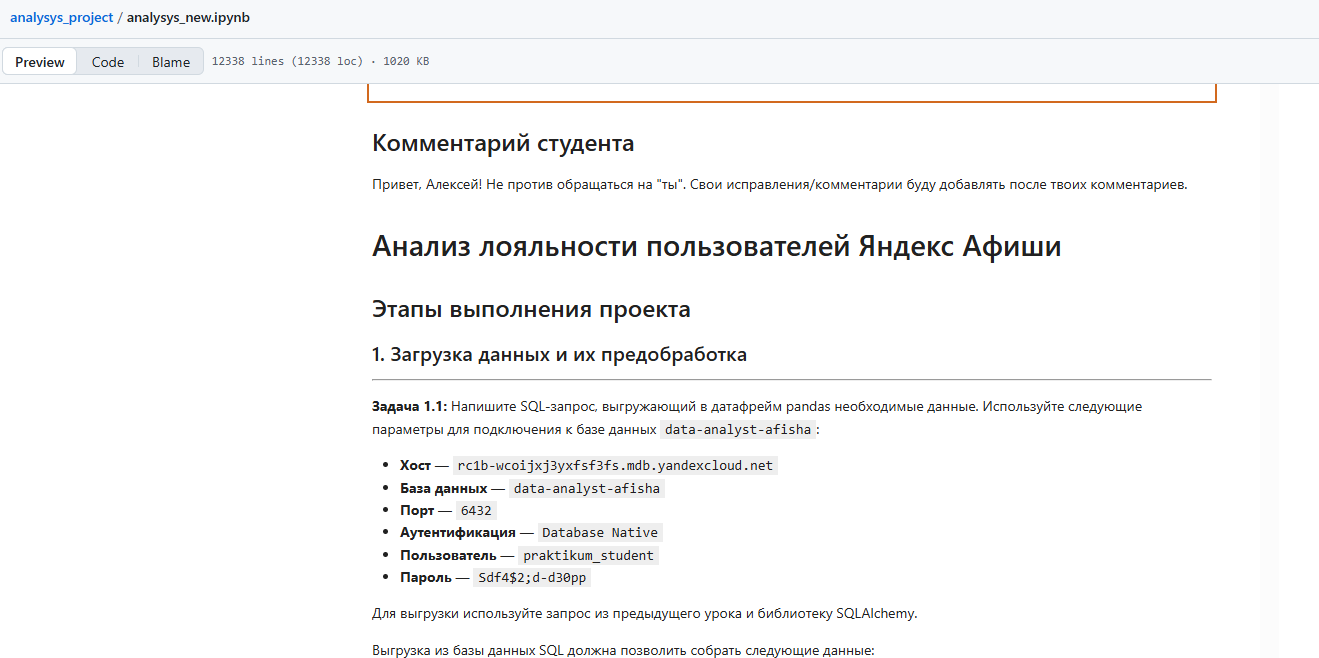    

<h2> Комментарий студента <a class="tocSkip"></h2>
    
Немного запуталась с видами подключения. Изначально сделала через файл .env, правда соединение было с использованием полноценной строки с паролем, хостом и т.д. После первой проверки (когда дальнейшие твои комментарии не сохранились) ты уточнил, что в рамках проекта такой метод не используется, поэтому нужен прямой ход подключения (через явное указание в переменных пароля, хоста и т.д.), но с f-строкой также для подключения. Теперь нужно снова через .env подключаться (оставила этот вид), какой вид подключения по итогу необходим? 
    
Параметры подключения из начала проекта убрала. В итоге все исправила согласно твоему последнему комментарию.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Марианна, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)